## 一、定义前向、后向传播
网络结构如下,包括3个fc层：
input(28\*28)=> fc (256) => relu => fc(256) => relu => fc(10)

In [10]:
import numpy as np
# 定义权重、神经元、梯度
weights={}
weights_scale=1e-3
weights["W1"]=weights_scale*np.random.randn(28*28,256)
weights["b1"]=np.zeros(256)
weights["W2"]=weights_scale*np.random.randn(256,256)
weights["b2"]=np.zeros(256)
weights["W3"]=weights_scale*np.random.randn(256,10)
weights["b3"]=np.zeros(10)

nuerons={}
gradients={}


In [11]:
from nn.layers import fc_forward
from nn.activations import relu_forward

# 定义前向过程
def forward(X):
    nuerons["z2"]=fc_forward(X,weights["W1"],weights["b1"])
    nuerons["z2_relu"]=relu_forward(nuerons["z2"])
    nuerons["z3"]=fc_forward(nuerons["z2_relu"],weights["W2"],weights["b2"])
    nuerons["z3_relu"]=relu_forward(nuerons["z3"])
    nuerons["y"]=fc_forward(nuerons["z3_relu"],weights["W3"],weights["b3"])
    return nuerons["y"]

In [12]:
from nn.losses import cross_entropy_loss
from nn.layers import fc_backward
from nn.activations import relu_backward

# 定义后向过程
def backward(X,y_true):
    loss,dy=cross_entropy_loss(nuerons["y"],y_true)
    gradients["W3"],gradients["b3"],gradients["z3_relu"]=fc_backward(dy,weights["W3"],nuerons["z3_relu"])
    gradients["z3"]=relu_backward(gradients["z3_relu"],nuerons["z3"])
    gradients["W2"],gradients["b2"],gradients["z2_relu"]=fc_backward(gradients["z3"],
                                                                     weights["W2"],nuerons["z2_relu"])
    gradients["z2"]=relu_backward(gradients["z2_relu"],nuerons["z2"])
    gradients["W1"],gradients["b1"],_=fc_backward(gradients["z2"],
                                                    weights["W1"],X)
    return loss

In [13]:
# 获取精度
def get_accuracy(X,y_true):
    y_predict=forward(X)
    return np.mean(np.equal(np.argmax(y_predict,axis=-1),
                            np.argmax(y_true,axis=-1)))

## 二、加载数据

mnist.pkl.gz数据源： http://deeplearning.net/data/mnist/mnist.pkl.gz   

In [14]:
from nn.load_mnist import load_mnist_datasets
from nn.utils import to_categorical
train_set, val_set, test_set = load_mnist_datasets('mnist.pkl.gz')
train_y,val_y,test_y=to_categorical(train_set[1]),to_categorical(val_set[1]),to_categorical(test_set[1])

In [15]:
# 随机选择训练样本
train_num = train_set[0].shape[0]
def next_batch(batch_size):
    idx=np.random.choice(train_num,batch_size)
    return train_set[0][idx],train_y[idx]

x,y= next_batch(16)
print("x.shape:{},y.shape:{}".format(x.shape,y.shape))

x.shape:(16, 784),y.shape:(16, 10)


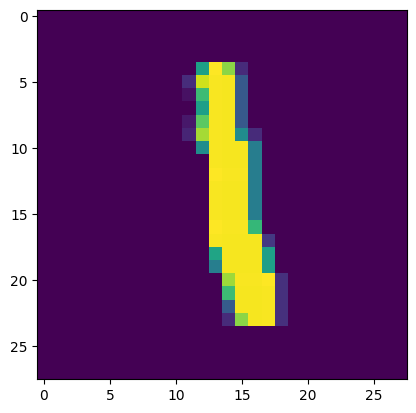

In [22]:
# 可视化
import matplotlib.pyplot as plt
digit=train_set[0][6]
plt.imshow(np.reshape(digit,(28,28)))
plt.show()

## 三、训练

In [17]:
# 初始化变量
batch_size=32
epoch = 3
steps = train_num // batch_size
lr = 0.1

for e in range(epoch):
    for s in range(steps):
        X,y=next_batch(batch_size)
        
        # 前向过程
        forward(X)
        loss=backward(X,y)
        
        # 更新梯度
        for k in ["W1","b1","W2","b2","W3","b3"]:
            weights[k]-=lr*gradients[k]
        
        if s % 500 ==0:
            print("\n epoch:{} step:{} ; loss:{}".format(e,s,loss))
            print(" train_acc:{};  val_acc:{}".format(get_accuracy(X,y),get_accuracy(val_set[0],val_y)))

            
print("\n final result test_acc:{};  val_acc:{}".
      format(get_accuracy(test_set[0],test_y),get_accuracy(val_set[0],val_y)))


 epoch:0 step:0 ; loss:2.3025857469602062
 train_acc:0.125;  val_acc:0.0639

 epoch:0 step:500 ; loss:2.2813018475059845
 train_acc:0.1875;  val_acc:0.1064

 epoch:0 step:1000 ; loss:2.2882977610395105
 train_acc:0.1875;  val_acc:0.1064

 epoch:0 step:1500 ; loss:2.3211416234448814
 train_acc:0.0625;  val_acc:0.1064

 epoch:1 step:0 ; loss:2.274048256878221
 train_acc:0.1875;  val_acc:0.1064

 epoch:1 step:500 ; loss:1.6534230653118813
 train_acc:0.46875;  val_acc:0.2997

 epoch:1 step:1000 ; loss:0.5060514874934432
 train_acc:0.875;  val_acc:0.7988

 epoch:1 step:1500 ; loss:0.3021776463312621
 train_acc:1.0;  val_acc:0.8565

 epoch:2 step:0 ; loss:0.456557697588161
 train_acc:0.96875;  val_acc:0.8769

 epoch:2 step:500 ; loss:0.5488682984539224
 train_acc:0.96875;  val_acc:0.9112

 epoch:2 step:1000 ; loss:0.24207094651425803
 train_acc:1.0;  val_acc:0.9447

 epoch:2 step:1500 ; loss:0.11873981836124708
 train_acc:1.0;  val_acc:0.9454

 final result test_acc:0.9439;  val_acc:0.9499


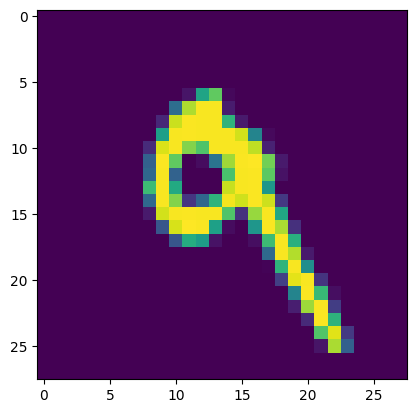

y_true:9,y_predict:9


In [25]:
# 查看预测结果
x,y=test_set[0][7],test_y[7]
plt.imshow(np.reshape(x,(28,28)))
plt.show()

y_predict = np.argmax(forward([x])[0])

print("y_true:{},y_predict:{}".format(np.argmax(y),y_predict))

